In [82]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import seaborn as sns

#from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
df = pd.read_csv("archive/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [83]:
df.shape

(284807, 31)

In [84]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [85]:
df.values

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
        -2.65608286e-02,  6.78800000e+01,  0.00000000e+00],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.04532821e-01,  1.00000000e+01,  0.00000000e+00],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         1.36489143e-02,  2.17000000e+02,  0.00000000e+00]])

In [86]:
cases = len(df)
cases

284807

In [87]:
nonfraud_count = len(df[df.Class == 0])
nonfraud_count

284315

In [88]:
fraud_count = len(df[df.Class == 1])
fraud_count

492

In [89]:
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)
fraud_percentage

0.17

In [90]:
# 2. Description

print(cl('CASE COUNT : ', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are : {}'.format(cases), attrs = ['bold']))
print(cl('Non-fraud cases are : {}'.format(nonfraud_count), attrs = ['bold'],))
print(cl('Fraud cases are : {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is : {} %'.format(fraud_percentage), attrs = ['bold'],color='green'))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT : 
--------------------------------------------
Total number of cases are : 284807
Non-fraud cases are : 284315
Fraud cases are : 492
Percentage of fraud cases is : 0.17 %
--------------------------------------------


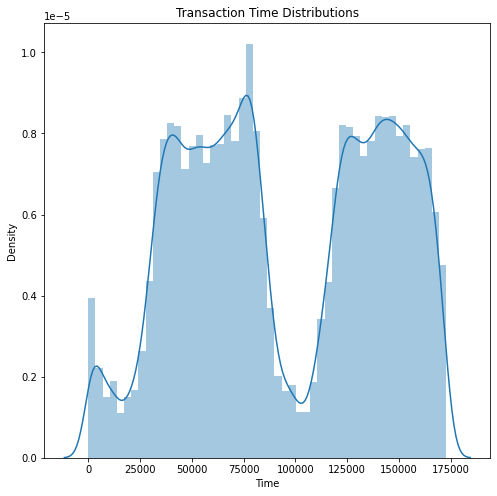

<AxesSubplot:title={'center':'Transaction Time Distributions'}, xlabel='Time', ylabel='Density'>

In [91]:
# 3. Distributions

# Transaction Time Distribution

plt.figure(figsize=(8,8))
plt.title('Transaction Time Distributions')
a=sns.distplot(df['Time'])
plt.show()
a

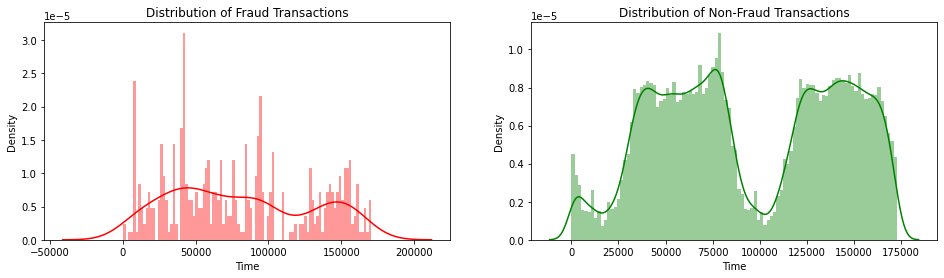

In [92]:
# Fraud Time Distribution

fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'],bins=100,color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100,color='green', ax=axs[1])
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

In [93]:
# Scale amount by log
df['amount_log'] = np.log(df.Amount + 0.01)

df.Amount,df['amount_log']

(0         149.62
 1           2.69
 2         378.66
 3         123.50
 4          69.99
            ...  
 284802      0.77
 284803     24.79
 284804     67.88
 284805     10.00
 284806    217.00
 Name: Amount, Length: 284807, dtype: float64,
 0         5.008166
 1         0.993252
 2         5.936665
 3         4.816322
 4         4.248495
             ...   
 284802   -0.248461
 284803    3.210844
 284804    4.217889
 284805    2.303585
 284806    5.379943
 Name: amount_log, Length: 284807, dtype: float64)

In [94]:
#Scale amount by Standardization

from sklearn.preprocessing import StandardScaler # data normalization

ss = StandardScaler()
df['amount_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))

df['amount_scaled']


0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: amount_scaled, Length: 284807, dtype: float64

In [95]:
#Scale amount by Normalization

from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
df['amount_minmax'] = norm.fit_transform(df['Amount'].values.reshape(-1,1))

df['amount_minmax']

0         0.005824
1         0.000105
2         0.014739
3         0.004807
4         0.002724
            ...   
284802    0.000030
284803    0.000965
284804    0.002642
284805    0.000389
284806    0.008446
Name: amount_minmax, Length: 284807, dtype: float64

In [106]:
#  training and predictions model to calculate the accuracy

#%% DATA SPLIT - SMOTE Dataset

from sklearn.model_selection import train_test_split # data split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.metrics import accuracy_score

X = df.drop(['Class','Amount','amount_minmax','amount_log'],axis=1) #removes Class,Amount.. we keep only the amount_scaled,time and v's 
y = df['Class'] # we will use y to compare it with the input


# to allocate 80% of the data for training and the remaining for testing
#X_train == training input, X_test == testing input, y_train == training output, y_test == testing output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True) 

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)
print('\n')
print('............')
print('\n')

smote= SMOTE(sampling_strategy='minority')
X_train_smote,y_train_smote=smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = X_test, y_test

print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)


model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)
print("accuracy score:",score)


X_train:  (227845, 30)
y_train:  (227845,)
X_test:  (56962, 30)
y_test:  (56962,)


............


X_train_smote:  (454902, 30)
y_train_smote:  (454902,)
X_test_smote:  (56962, 30)
y_test_smote:  (56962,)
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284

In [107]:
#%% METRICS
"""
For calculating the performance of each Classification model(with all the five 
datasets), it would be really beneficial to create a function which could 
evaluate all the metrics mentioned above and store them so that they could be
compared later.
"""
names=[]
aucs_tests = []   #AUC-ROC CURVE https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
accuracy_tests = []
precision_tests = []
recall_tests = []
f1_score_tests = []
mcc_score_tests = []

def performance(model):
    for name, model, X_train, y_train, X_test, y_test in model:
        
        #appending name
        names.append(name)
        
        # Build model
        model.fit(X_train, y_train)
        
        #predictions
        y_test_pred = model.predict(X_test)
        
        # calculate accuracy
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_tests.append(Accuracy_test)
        
        # calculate auc
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_tests.append(Aucs_test)
        
        #precision_calculation
        Precision_score_test = metrics.precision_score(y_test , y_test_pred)
        precision_tests.append(Precision_score_test)
        
        # calculate recall
        Recall_score_test = metrics.recall_score(y_test , y_test_pred)
        recall_tests.append(Recall_score_test)
        
        #calculating F1
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_score_tests.append(F1Score_test)
        
        #calculating MCC
        MCC_score_tests = metrics.matthews_corrcoef(y_test, y_test_pred)
        mcc_score_tests.append(MCC_score_tests)
        
        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred) 
        
        print("Model Name :", name)
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        print('Test Precision : {0:0.5f}'.format(Precision_score_test))
        print('Test Recall : {0:0.5f}'.format(Recall_score_test))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        print("The Matthews correlation coefficient is{0:0.5f}".format(MCC_score_tests))
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")

        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()




Model Name : LR IMBALANCED
Test Accuracy :0.99828
Test AUC : 0.50000
Test Precision : 0.00000
Test Recall : 0.00000
Test F1 : 0.00000
The Matthews correlation coefficient is0.00000
Confusion Matrix : 
 [[56864     0]
 [   98     0]]


Model Name : LR SMOTE
Test Accuracy :0.99530
Test AUC : 0.78882
Test Precision : 0.20070
Test Recall : 0.58163
Test F1 : 0.29843
The Matthews correlation coefficient is0.33988
Confusion Matrix : 
 [[56637   227]
 [   41    57]]




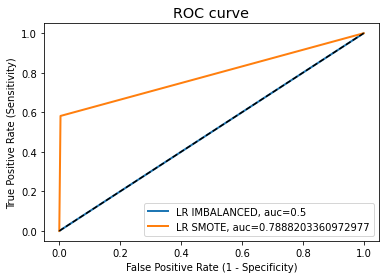

Model Name : RF IMABALANCED
Test Accuracy :0.99968
Test AUC : 0.91835
Test Precision : 0.97619
Test Recall : 0.83673
Test F1 : 0.90110
The Matthews correlation coefficient is0.90363
Confusion Matrix : 
 [[56862     2]
 [   16    82]]


Model Name : RF SMOTE
Test Accuracy :0.99947
Test AUC : 0.91315
Test Precision : 0.86170
Test Recall : 0.82653
Test F1 : 0.84375
The Matthews correlation coefficient is0.84367
Confusion Matrix : 
 [[56851    13]
 [   17    81]]




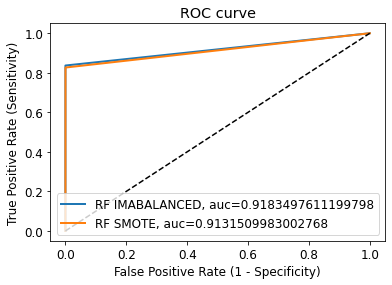

Model Name : NB IMBALANCED
Test Accuracy :0.99354
Test AUC : 0.83378
Test Precision : 0.16418
Test Recall : 0.67347
Test F1 : 0.26400
The Matthews correlation coefficient is0.33049
Confusion Matrix : 
 [[56528   336]
 [   32    66]]


Model Name : NB SMOTE
Test Accuracy :0.99163
Test AUC : 0.89394
Test Precision : 0.14579
Test Recall : 0.79592
Test F1 : 0.24645
The Matthews correlation coefficient is0.33851
Confusion Matrix : 
 [[56407   457]
 [   20    78]]




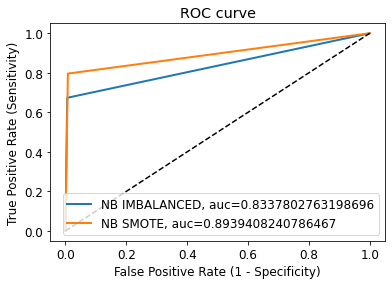

Model Name : DT IMBALANCED
Test Accuracy :0.99914
Test AUC : 0.89770
Test Precision : 0.72897
Test Recall : 0.79592
Test F1 : 0.76098
The Matthews correlation coefficient is0.76128
Confusion Matrix : 
 [[56835    29]
 [   20    78]]


Model Name : DT SMOTE
Test Accuracy :0.99745
Test AUC : 0.90195
Test Precision : 0.38537
Test Recall : 0.80612
Test F1 : 0.52145
The Matthews correlation coefficient is0.55635
Confusion Matrix : 
 [[56738   126]
 [   19    79]]




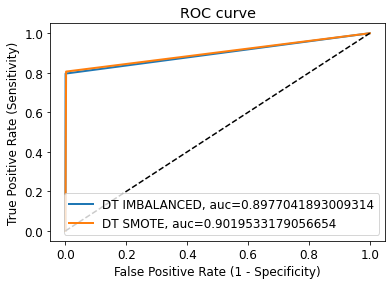

Model Name : KNN IMBALANCE
Test Accuracy :0.99851
Test AUC : 0.56633
Test Precision : 1.00000
Test Recall : 0.13265
Test F1 : 0.23423
The Matthews correlation coefficient is0.36394
Confusion Matrix : 
 [[56864     0]
 [   85    13]]


Model Name : KNN SMOTE
Test Accuracy :0.98081
Test AUC : 0.84778
Test Precision : 0.06167
Test Recall : 0.71429
Test F1 : 0.11354
The Matthews correlation coefficient is0.20627
Confusion Matrix : 
 [[55799  1065]
 [   28    70]]




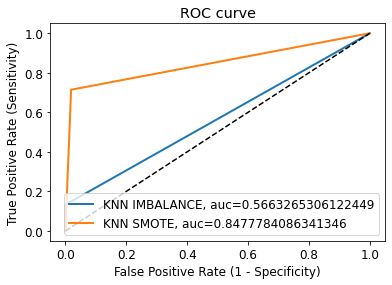

Model Name : XGBOOST IMBALANCED
Test Accuracy :0.99965
Test AUC : 0.92852
Test Precision : 0.93333
Test Recall : 0.85714
Test F1 : 0.89362
The Matthews correlation coefficient is0.89425
Confusion Matrix : 
 [[56858     6]
 [   14    84]]


Model Name : XGBOOST SMOTE
Test Accuracy :0.99930
Test AUC : 0.92834
Test Precision : 0.76364
Test Recall : 0.85714
Test F1 : 0.80769
The Matthews correlation coefficient is0.80869
Confusion Matrix : 
 [[56838    26]
 [   14    84]]




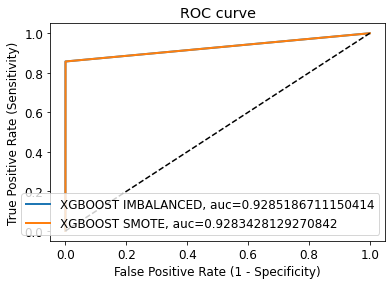

Model Name : MLPClassifier IMBALANCE
Test Accuracy :0.99837
Test AUC : 0.66812
Test Precision : 0.54098
Test Recall : 0.33673
Test F1 : 0.41509
The Matthews correlation coefficient is0.42605
Confusion Matrix : 
 [[56836    28]
 [   65    33]]


Model Name : MLPClassifier SMOTE
Test Accuracy :0.98789
Test AUC : 0.95319
Test Precision : 0.11658
Test Recall : 0.91837
Test F1 : 0.20690
The Matthews correlation coefficient is0.32486
Confusion Matrix : 
 [[56182   682]
 [    8    90]]




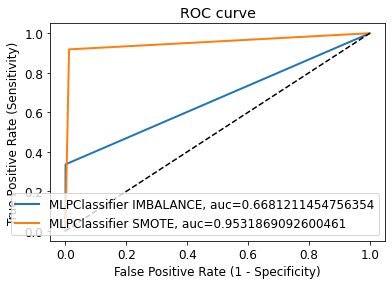

In [108]:
#%% MODELING - CLASSIFICATION ALGORITHMS
    
# 1. Logical Regression Classifier


LRmodel=[]

LRmodel.append(('LR IMBALANCED', LogisticRegression(solver='saga',multi_class='multinomial'),X_train, y_train, X_test, y_test))
LRmodel.append(('LR SMOTE', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(LRmodel)

# 2. Random Forest Classifier

RFmodel = []

RFmodel.append(('RF IMABALANCED', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodel.append(('RF SMOTE', RandomForestClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(RFmodel)


# 3. Gaussian Naïve Bayes Classifier

NBmodel = []

NBmodel.append(('NB IMBALANCED', GaussianNB(),X_train,y_train,X_test,y_test))
NBmodel.append(('NB SMOTE', GaussianNB(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(NBmodel)

# 4. Decision Tree Classifier

DTmodel = []

DTmodel.append(('DT IMBALANCED', DecisionTreeClassifier(),X_train,y_train,X_test,y_test))
DTmodel.append(('DT SMOTE', DecisionTreeClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(DTmodel)

# 5. K-Nearest Neighbor Class

KNNmodel = []

KNNmodel.append(('KNN IMBALANCE', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodel.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(KNNmodel)

# 6. XG Boost Classifier

xgBOOST=[]
xgBOOST.append(('XGBOOST IMBALANCED', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train, y_train, X_test, y_test))
xgBOOST.append(('XGBOOST SMOTE', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(xgBOOST)

# 7. MLP Classifier

MLPclassifier=[]

MLPclassifier.append(('MLPClassifier IMBALANCE', MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000),X_train,y_train,X_test,y_test))
MLPclassifier.append(('MLPClassifier SMOTE',MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(MLPclassifier)

In [109]:
#https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7#:~:text=The%20Matthews%20correlation%20coefficient%20(MCC)%2C%20instead%2C%20is%20a,both%20to%20the%20size%20of
#https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
# COMPARE MCC SCORE FOR ALL DATASETS
comparison={
    'Model': names,
    'Accuracy': accuracy_tests,
    'AUC': aucs_tests,
    'Precision Score' : precision_tests,
    'Recall Score': recall_tests, 
    'F1 Score': f1_score_tests,
    'MCC Score': mcc_score_tests
}
print("Comparing performance of various Classifiers: \n \n")
comparison=pd.DataFrame(comparison)
comparison.sort_values('MCC Score',ascending=False)

#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

Comparing performance of various Classifiers: 
 



,Model,Accuracy,AUC,Precision Score,Recall Score,F1 Score,MCC Score
2,RF IMABALANCED,0.999684,0.918350,0.976190,0.836735,0.901099,0.903628
10,XGBOOST IMBALANCED,0.999649,0.928519,0.933333,0.857143,0.893617,0.894254
3,RF SMOTE,0.999473,0.913151,0.861702,0.826531,0.843750,0.843670
11,XGBOOST SMOTE,0.999298,0.928343,0.763636,0.857143,0.807692,0.808694
6,DT IMBALANCED,0.999140,0.897704,0.728972,0.795918,0.760976,0.761282
7,DT SMOTE,0.997454,0.901953,0.385366,0.806122,0.521452,0.556353
12,MLPClassifier IMBALANCE,0.998367,0.668121,0.540984,0.336735,0.415094,0.426049
8,KNN IMBALANCE,0.998508,0.566327,1.000000,0.132653,0.234234,0.363944
1,LR SMOTE,0.995295,0.788820,0.200704,0.581633,0.298429,0.339878
5,NB SMOTE,0.991626,0.893941,0.145794,0.795918,0.246445,0.338511
